In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [3]:
img.shape

(600, 394, 3)

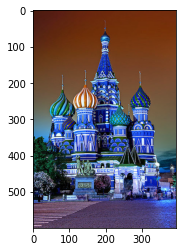

In [4]:
plt.imshow(img)
plt.show()

In [5]:
img.shape

all_pixels=img.reshape((-1,3))

all_pixels.shape

all_pixels.shape

(236400, 3)

# Visualizing The Image through K-Means sklearn

In [6]:
from sklearn.cluster import KMeans

In [7]:
k=9
km=KMeans(n_clusters=k)

In [8]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [9]:
km.cluster_centers_

array([[109.20149192,  50.22839969,  18.10027141],
       [ 50.13145887, 104.86508817, 225.1481687 ],
       [138.57033741, 165.25865777, 210.53563218],
       [ 13.16715028,  23.64474985,  28.380632  ],
       [216.13697559, 231.69339008, 241.08677148],
       [115.81817486,  83.88398213,  54.80980217],
       [ 64.55653465,  63.74019802,  96.70716172],
       [ 17.6231012 ,  39.10750715, 166.05547809],
       [102.95809137, 110.44454123, 130.17479675]])

In [10]:
centers=np.array(km.cluster_centers_,dtype="uint")
#uint8 to represent number btw 0-255 8 bit integer is sufficient 

In [11]:
centers 

array([[109,  50,  18],
       [ 50, 104, 225],
       [138, 165, 210],
       [ 13,  23,  28],
       [216, 231, 241],
       [115,  83,  54],
       [ 64,  63,  96],
       [ 17,  39, 166],
       [102, 110, 130]], dtype=uint32)

### plot all these color ( data centres)

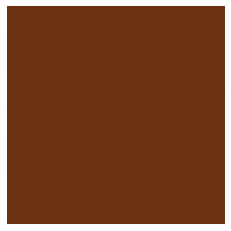

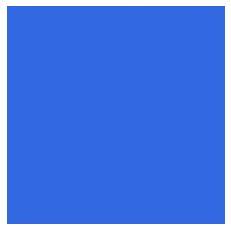

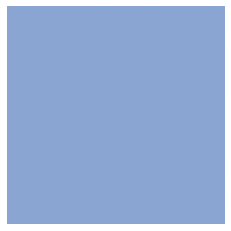

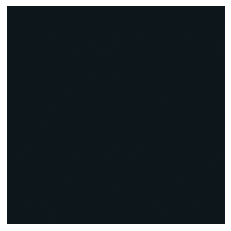

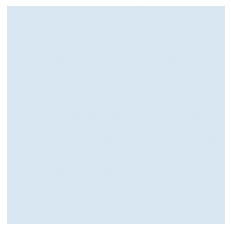

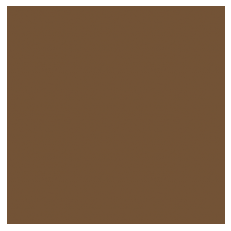

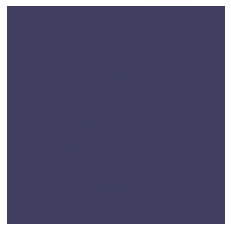

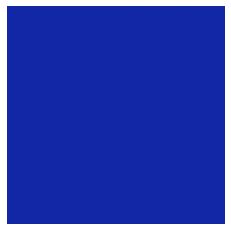

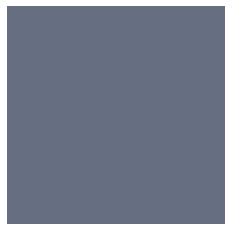

In [12]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [13]:
km.labels_

array([0, 0, 0, ..., 1, 6, 6])

In [14]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [15]:
new_img.shape


(236400, 3)

In [16]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]): #pic colors from centre and map it according to labels
    new_img[ix] = centers[km.labels_[ix]]

or we can do it like this by using plt.figure and creating list of all colors

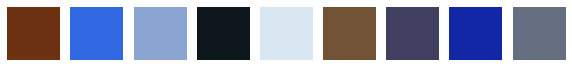

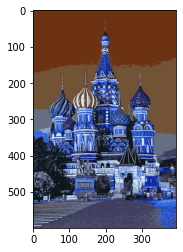

In [17]:
i= 1

plt.figure(0,figsize=(10,2)) #fig size


colors = []

for each_col in centers:
    plt.subplot(1,len(centers),i) # 1 row 9 col
    plt.axis("off")
    i+=1 #everytime we go to next box we increment it!
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

In [18]:
new_img = new_img.reshape((600,394,3))


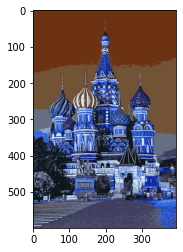

In [19]:
plt.imshow(new_img)
plt.show()

In [20]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar

In [21]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

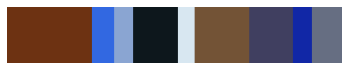

In [22]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()

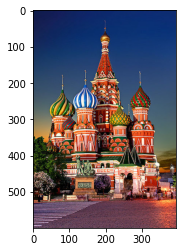

In [23]:

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [24]:
img.shape

(600, 394, 3)

In [25]:
all_pixels=img.reshape((-1,3)) 

In [26]:
from sklearn.cluster import KMeans
k=9
km=KMeans(n_clusters=k)
#so it will take color from cluster and find color 
km.fit(all_pixels)
km.cluster_centers_ #center we have in decimal 
#so rgb(14.91798497,  17.94468754,  13.52473915)<== are some color as these ar some dominant points

array([[ 18.10027141,  50.22839969, 109.20149192],
       [210.52651121, 165.31479281, 138.71780781],
       [225.15200889, 105.06924644,  50.29222983],
       [166.33223419,  39.18809995,  17.63105444],
       [130.15232749, 110.43394948, 102.95475661],
       [241.11109179, 231.72435675, 216.15829277],
       [ 54.80980217,  83.88398213, 115.81817486],
       [ 96.71812125,  63.7171977 ,  64.51751435],
       [ 28.38942737,  23.64389109,  13.16324448]])

In [27]:
centers=np.array(km.cluster_centers_,dtype="uint") #so changing it in integers
#centers==>color
centers

array([[ 18,  50, 109],
       [210, 165, 138],
       [225, 105,  50],
       [166,  39,  17],
       [130, 110, 102],
       [241, 231, 216],
       [ 54,  83, 115],
       [ 96,  63,  64],
       [ 28,  23,  13]], dtype=uint32)

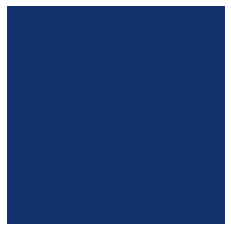

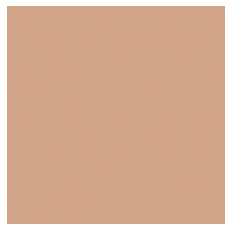

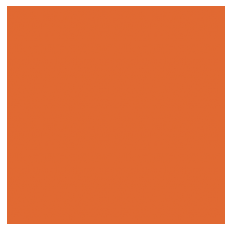

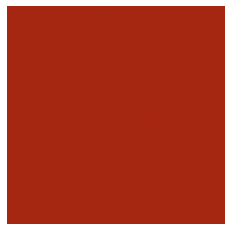

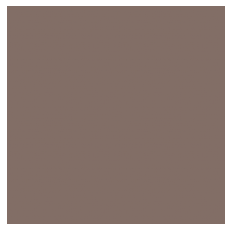

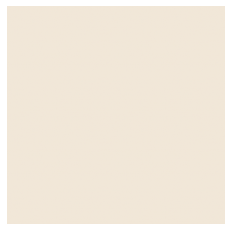

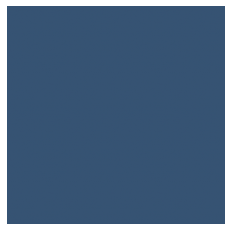

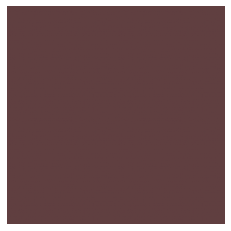

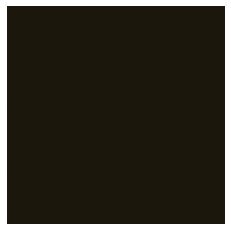

In [28]:
for c in centers:
    a=np.zeros((100,100,3)) #image 
    a[:,:,:]=c #so image will broadcast into a of the cluster center from img
    
    plt.imshow(a/255) #a should be in 0 and 1
    plt.axis("off") #removing axis 
    plt.show()

In [29]:
km.labels_#it will give cluster number associated with a cluster
km.labels_.shape #showing number of cluster 

(236400,)

In [30]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")
new_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint32)

In [31]:
new_img.shape
#you have same shape of image eariler of Pixels

(236400, 3)

In [32]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
#in this we are iterating over all the points of image alloting all the color we have to new image
#colors are in center 

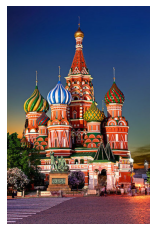

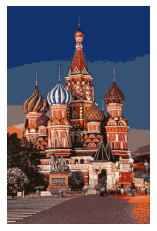

In [37]:
new_img = new_img.reshape((600, 394,3))
plt.imshow(img)
plt.axis('off')
plt.show()
plt.axis('off')
plt.imshow(new_img)
plt.show()